# Pose Landmarks Detection with MediaPipe Tasks


## Preparation



In [101]:
!pip install -q mediapipe==0.10.0

In [103]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

##Imports and POSE_CONNECTIONS

In [104]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import cv2
from google.colab.patches import cv2_imshow

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d.art3d import Poly3DCollection


POSE_CONNECTIONS = frozenset([(0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5),
                              (5, 6), (6, 8), (9, 10), (11, 12), (11, 13),
                              (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
                              (12, 14), (14, 16), (16, 18), (16, 20), (16, 22),
                              (18, 20), (11, 23), (12, 24), (23, 24), (23, 25),
                              (24, 26), (25, 27), (26, 28), (27, 29), (28, 30),
                              (29, 31), (30, 32), (27, 31), (28, 32)])


## Visualization utilities

In [105]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image


#### Add links to other images

In [106]:
#!wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg
#!wget -q -O image.jpg https://i.postimg.cc/hvqycw2t/1.jpg #- вроде верно, но здесь точка отъезжает почему-то
#!wget -q -O image.jpg https://i.postimg.cc/9fKQft3k/4.jpg #- верно
#!wget -q -O image.jpg https://i.postimg.cc/8PLGdQ2t/3.jpg #- разметка правильная, на маске мешает руль - верно
#!wget -q -O image.jpg https://i.postimg.cc/QdBpYmq4/6.jpg #- неправильно определилась рука, но в целом вроде работает
#!wget -q -O image.jpg https://i.postimg.cc/qvtf7fkk/2.jpg #- неверно
#!wget -q -O image.jpg https://i.postimg.cc/Tw4K1xJJ/11.png #- не совсем то, но в целом верно
#!wget -q -O image.jpg https://i.postimg.cc/RFdpks9t/15.png #- вроде верно, возможно не совсем
!wget -q -O image.jpg https://i.postimg.cc/gcCdNjSP/16.jpg # - верно
#!wget -q -O image.jpg https://i.postimg.cc/BQtsCyfR/18.jpg #- в целом верно
#!wget -q -O image.jpg https://api.psychologos.ru/storage/image/9a11a71c23107633f696e97e165b553b.jpg

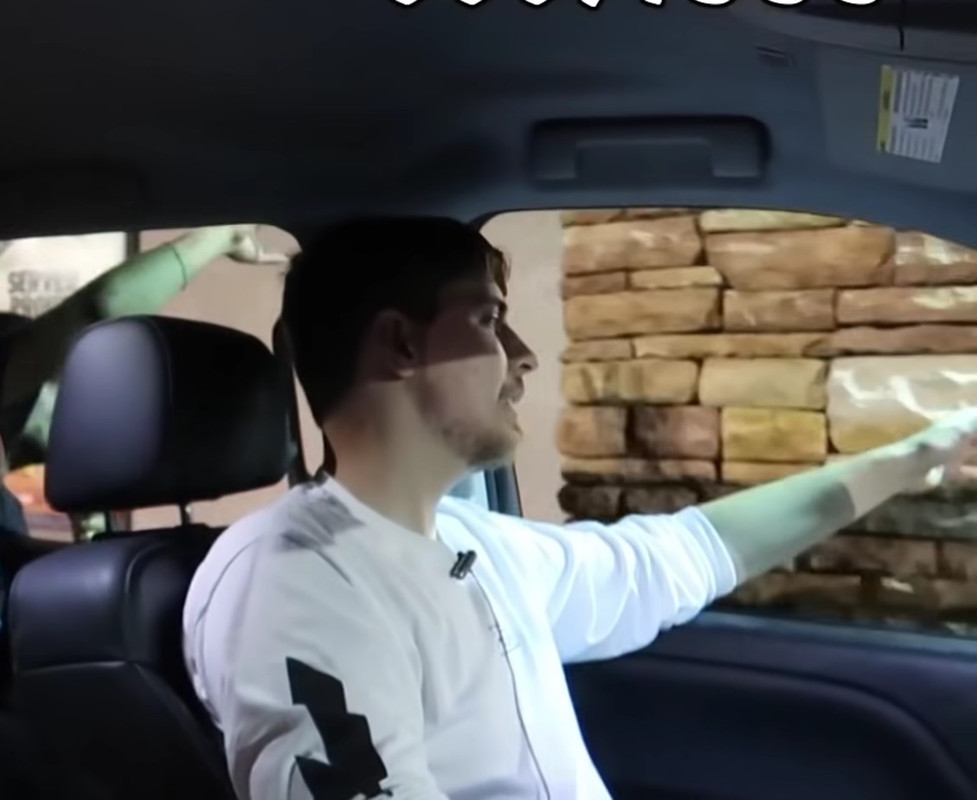

In [107]:
img = cv2.imread("image.jpg")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.


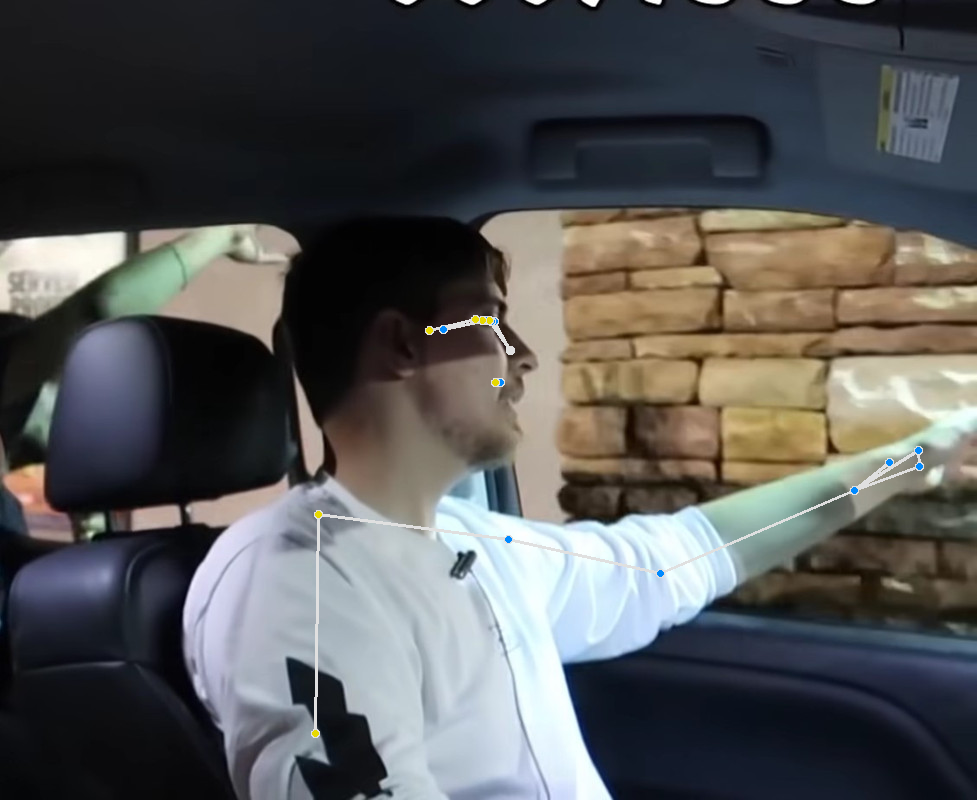

In [108]:
# STEP 1: Import the necessary modules.

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

Visualize the pose segmentation mask.

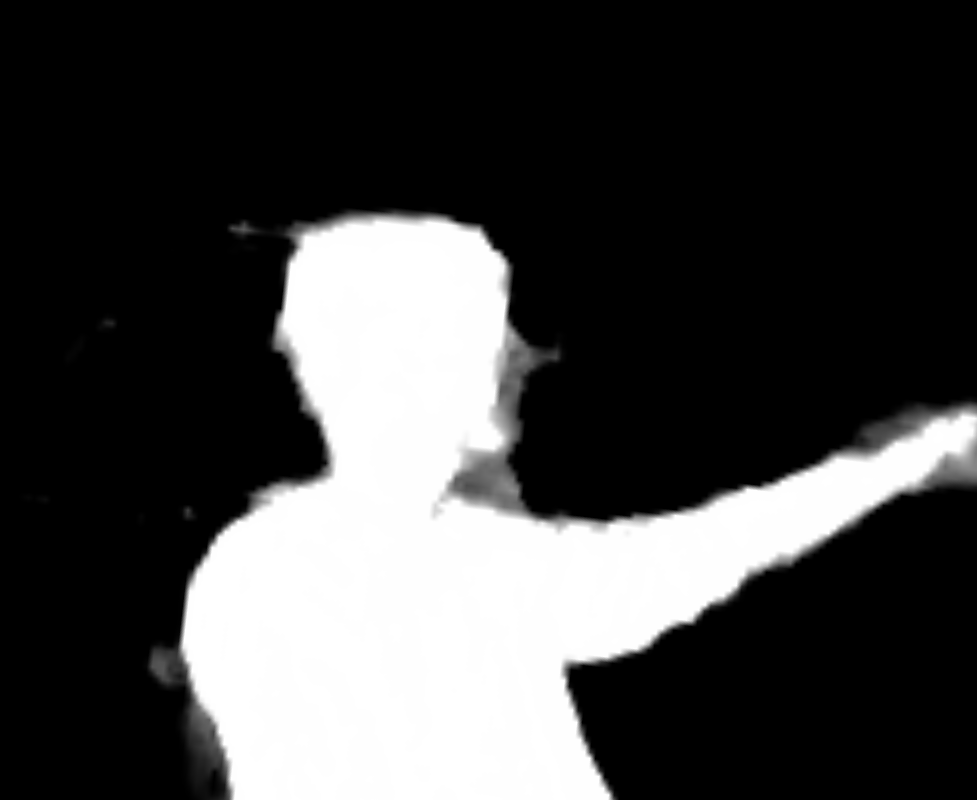

In [109]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)

##Search for coordinates

In [110]:
for result in detection_result.pose_world_landmarks:
  for landmark in result:
    print(landmark)

Landmark(x=0.1499500870704651, y=-0.6153007745742798, z=-0.07703933864831924, visibility=0.9993870258331299, presence=0.9967691898345947)
Landmark(x=0.1331910341978073, y=-0.6376504302024841, z=-0.0574459470808506, visibility=0.99858558177948, presence=0.9950286746025085)
Landmark(x=0.13440267741680145, y=-0.6368653178215027, z=-0.04921752214431763, visibility=0.9981721639633179, presence=0.9958361387252808)
Landmark(x=0.13271436095237732, y=-0.6394335627555847, z=-0.05160375311970711, visibility=0.9989480376243591, presence=0.9954866766929626)
Landmark(x=0.13839173316955566, y=-0.6453800201416016, z=-0.1021275520324707, visibility=0.9995841383934021, presence=0.9946271777153015)
Landmark(x=0.13965314626693726, y=-0.6429440379142761, z=-0.11556132137775421, visibility=0.9995952248573303, presence=0.995975911617279)
Landmark(x=0.14106714725494385, y=-0.6335799694061279, z=-0.09639167785644531, visibility=0.9997230172157288, presence=0.9955590963363647)
Landmark(x=0.06807891279459, y=-0.

## Construct a diagram using the found WorldLandmarks, and look for an intersection point with the window plane

### Making a chart

In [111]:

def WorldLandmarks_diagram(x, y, z):
  #Drawing up a diagram based on the obtained landmarks
  ax.scatter(x, y, z, color = 'skyblue')

  for c in POSE_CONNECTIONS:
    ax.plot([x[c[0]], x[c[1]]], [y[c[0]], y[c[1]]], [z[c[0]], z[c[1]]], color = 'skyblue')


def Vector(x, y, z):
  # vector construction from elbow to wrist
  point_elbow = np.array([x[13], y[13], z[13]])
  point_wrist = np.array([x[15], y[15], z[15]])
  vector = point_wrist - point_elbow
  print("Required vector is" + str(vector))

  ax.quiver(point_elbow[0], point_elbow[1], point_elbow[2], vector[0], vector[1], vector[2], color = 'navy')
  return vector


### Find the window plane

In [112]:
def Plane(x, y, z):
  # It was necessary to find a point close enough to the elbow so that there was no false triggering when the driver was leaning on the window but not extending his arm
  grid  = np.array([[1.2 * x[13], -1, 0],[1.2 * x[13], 1, 0],[1.2 * x[13], 1, 1],[1.2 * x[13] , -1, 1]])

  ax.add_collection3d(Poly3DCollection([grid], facecolor = 'g', alpha = 0.3))

  a = ['A', 'B', 'C', 'D']
  for i, j in enumerate(a):
    ax.text(grid[i][0], grid[i][1], grid[i][2], j)
  return grid

### Find the intersection point of the vector with the plane

In [113]:
def FindIntersection(x, y, z, grid, vector):
  # Looking for normal: the normal can be found as the vector product of two perpendicular vectors in this plane
  vector_AB = grid[1] - grid[0]
  vector_BC = grid[2] - grid[1]
  Normal = np.cross(vector_AB, vector_BC) # Our normal

  elbow = np.array([x[13], y[13], z[13]]) # The point on the vector
  point_A = grid[0] # The point on the plane
  new_vector = elbow - point_A # Vector elbow->point_on_the_plane

  if  Normal.dot(vector) > 0:
    number = -(Normal.dot(new_vector) / Normal.dot(vector))

    point_M = elbow + vector * number

    print('Intersection point is ' + str(point_M))

    ax.scatter(point_M[0], point_M[1], point_M[2], color = "purple")
    ax.text(point_M[0], point_M[1], point_M[2], 'M')
  else:
    print("The hand doesn't intersect the pseudo-window")

### Result

Required vector is[ 0.23167282 -0.09531298  0.0413916 ]
Intersection point is [ 0.43791404 -0.45464897  0.14611305]


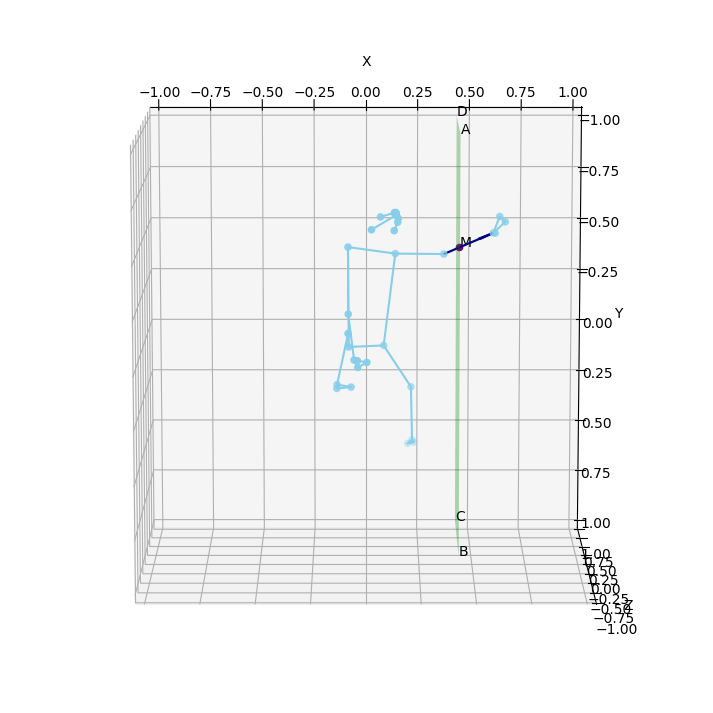

In [114]:
x = []
y = []
z = []
for result in detection_result.pose_world_landmarks:
  for landmark in result:
    x.append(landmark.x)
    y.append(landmark.y)
    z.append(landmark.z)

fig = plt.figure(figsize = [9, 9])
ax = fig.add_subplot(111, projection='3d')
ax.view_init(280, 270)

WorldLandmarks_diagram(x, y, z)
vector = Vector(x, y, z)
plane = Plane(x, y, z)
FindIntersection(x, y, z, plane, vector)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()